# Heart Failure Prediction
Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# 1) Data Analysis

In [69]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv(r"C:\Users\dell\Desktop\Data Science & ML\Heart Failure Prediction Dataset\heart.csv")
data. head(11)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [71]:
data.shape

(918, 12)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# 2) Data Visualization 

<AxesSubplot:>

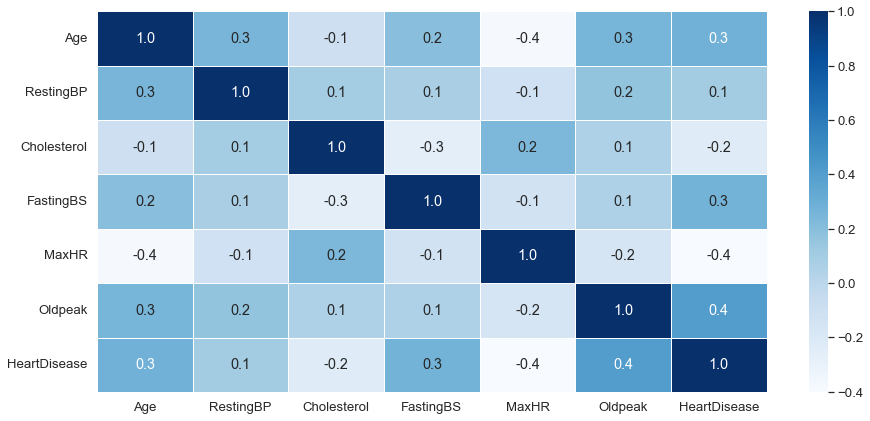

In [74]:
sns.set(rc={'figure.figsize':[15,7]},font_scale=1.2)
sns.heatmap(data.corr(),annot=True,fmt='.1f',linewidths=.5,cmap='Blues')

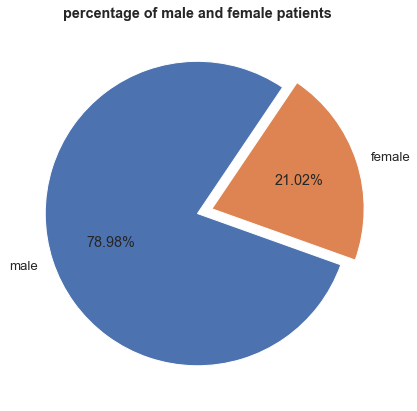

In [91]:
plt.figure(figsize=(10,7))
plt.title("percentage of male and female patients",fontweight="bold")
values = data["Sex"].value_counts()
plt.pie(values, labels=["male","female"], explode=(0,0.1), autopct="%.2f%%", startangle=56)
plt.show()

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

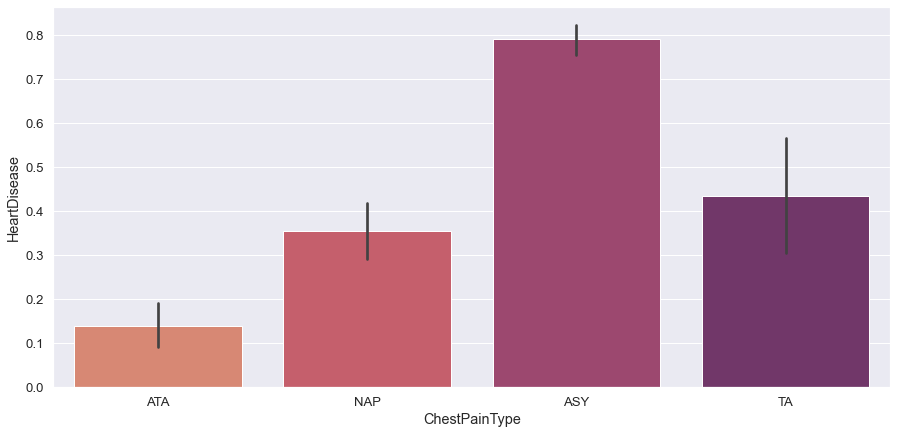

In [80]:
sns.barplot(x='ChestPainType',y='HeartDisease',data=data,palette='flare')

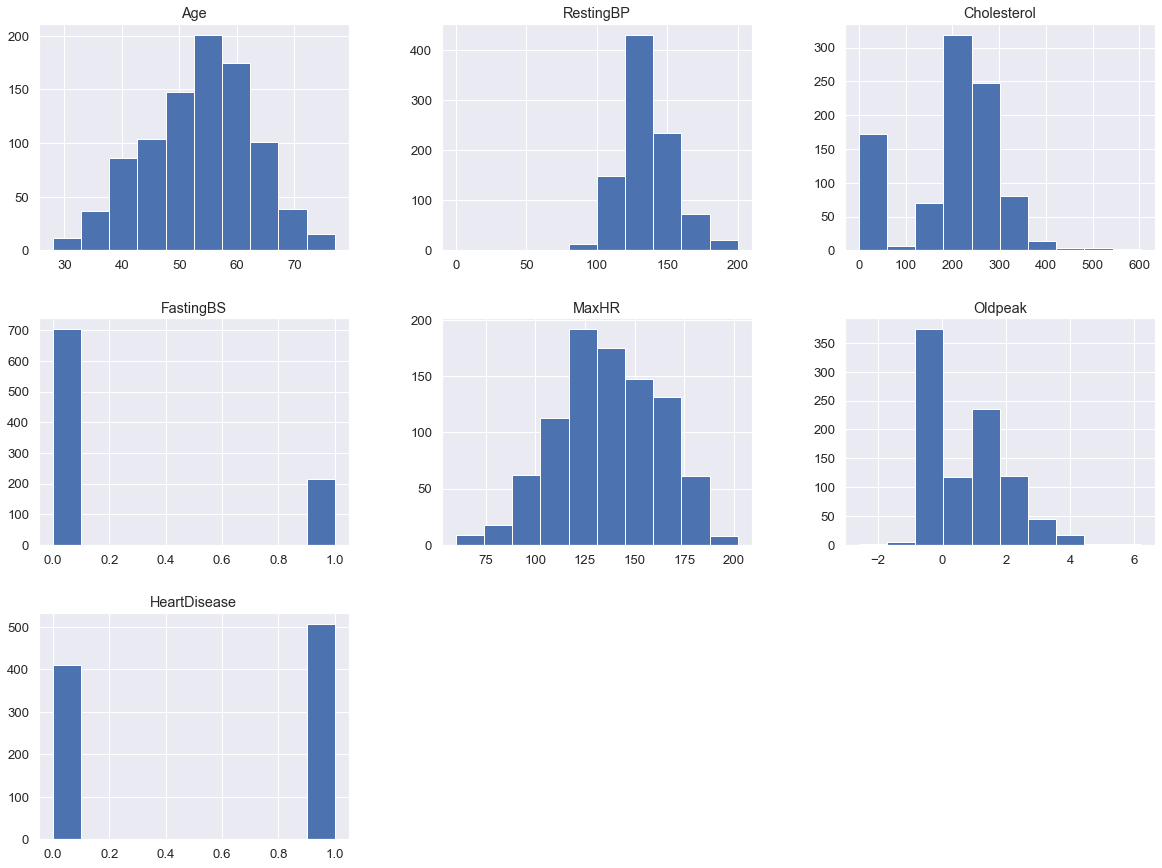

In [40]:
data.hist(figsize=(20,15))
plt.show()

# 3) Data Cleaning & preprossing 

In [7]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [36]:
#categrical values  Sex      
sex=data['Sex'].value_counts()
print('categrical values :-')
print('1- sex vaiues:\n' ,sex)
print('='*20)


#categrical values ChestPainType    
ChestPainType=data['ChestPainType'].value_counts()
print('2- ChestPainType vaiues:\n' ,ChestPainType)
print('='*20)


#categrical values RestingECG     
RestingECG=data['RestingECG'].value_counts()
print('3- RestingECG vaiues:\n' ,RestingECG)
print('='*20)


#categrical values ExerciseAngina     
ExerciseAngina=data['ExerciseAngina'].value_counts()
print('4- ExerciseAngina vaiues:\n' ,ExerciseAngina)
print('='*20)

#categrical values ST_Slope     
ST_Slope=data['ST_Slope'].value_counts()
print('5- ST_Slope vaiues:\n' ,ST_Slope)


categrical values :-
1- sex vaiues:
 M    725
F    193
Name: Sex, dtype: int64
2- ChestPainType vaiues:
 ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
3- RestingECG vaiues:
 Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
4- ExerciseAngina vaiues:
 N    547
Y    371
Name: ExerciseAngina, dtype: int64
5- ST_Slope vaiues:
 Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [40]:
Sex= pd.get_dummies(data['Sex'])


ChestPainType= pd.get_dummies(data['ChestPainType'])


RestingECG= pd.get_dummies(data['RestingECG'])


ExerciseAngina= pd.get_dummies(data['ExerciseAngina'])


ST_Slope= pd.get_dummies(data['ST_Slope'])


#adding the columns in New dataset
data= pd.concat([data,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope],axis=1)
data.head(11)
# delete the columns ['Education','Year_Birth','Marital_Status']
data.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True)
data.head(11)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ASY,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
5,39,120,339,0,170,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
6,45,130,237,0,170,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
7,54,110,208,0,142,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
8,37,140,207,0,130,1.5,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
9,48,120,284,0,120,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1


# 4) Machine Learing 
Bulding the Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
x=data.drop(['HeartDisease'],axis=1)
y=data['HeartDisease']

In [43]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.8, random_state=42)

[[230 152]
 [ 89 264]]
              precision    recall  f1-score   support

           0       0.72      0.60      0.66       382
           1       0.63      0.75      0.69       353

    accuracy                           0.67       735
   macro avg       0.68      0.67      0.67       735
weighted avg       0.68      0.67      0.67       735



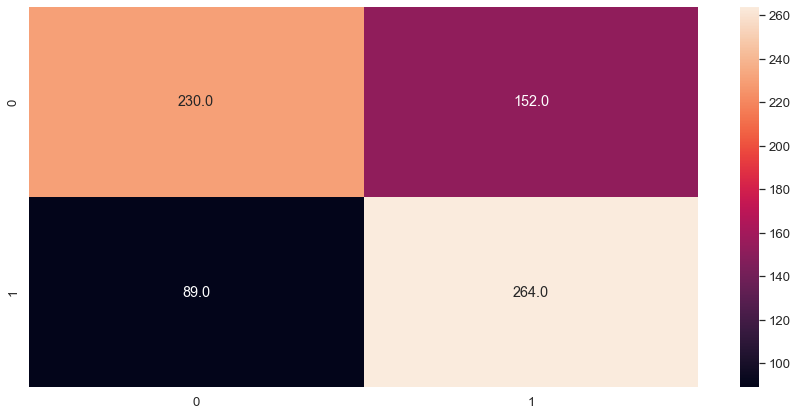

In [62]:
# K-NN Algorithm
def all(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.1f')
model1=KNeighborsClassifier()
all(model1)    

[[230 152]
 [ 89 264]]
              precision    recall  f1-score   support

           0       0.72      0.60      0.66       382
           1       0.63      0.75      0.69       353

    accuracy                           0.67       735
   macro avg       0.68      0.67      0.67       735
weighted avg       0.68      0.67      0.67       735



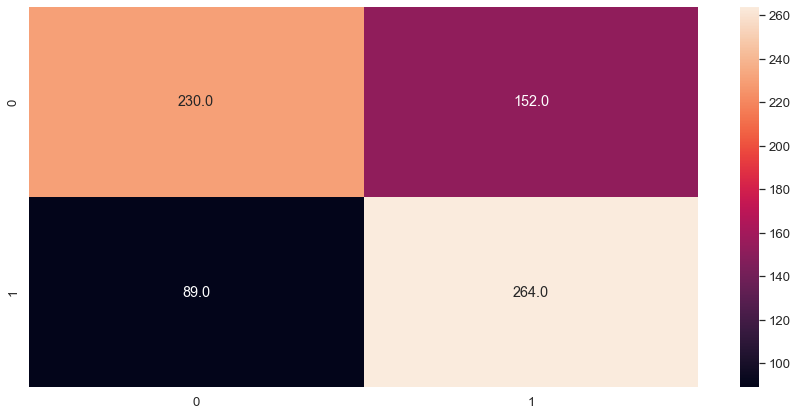

In [63]:
# SVM Algorithm
def all(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.1f')
model2=SVC()
all(model1)    

[[230 152]
 [ 89 264]]
              precision    recall  f1-score   support

           0       0.72      0.60      0.66       382
           1       0.63      0.75      0.69       353

    accuracy                           0.67       735
   macro avg       0.68      0.67      0.67       735
weighted avg       0.68      0.67      0.67       735



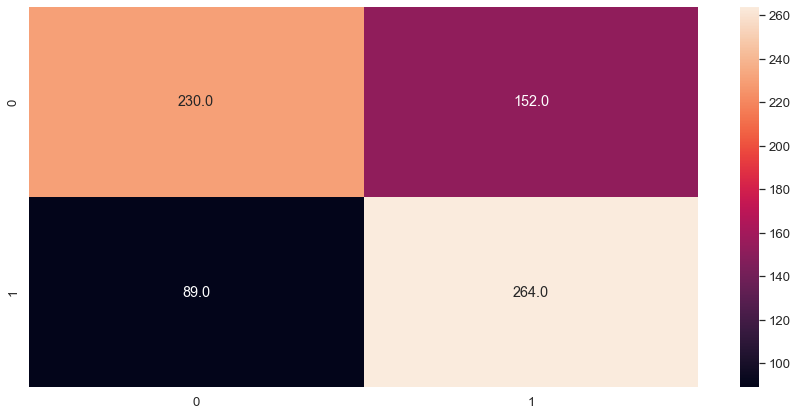

In [64]:
#DecisionTree Algorithm
def all(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.1f') 
model3=DecisionTreeClassifier()
all(model1)    

[[282  80]
 [ 37 336]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       362
           1       0.81      0.90      0.85       373

    accuracy                           0.84       735
   macro avg       0.85      0.84      0.84       735
weighted avg       0.85      0.84      0.84       735



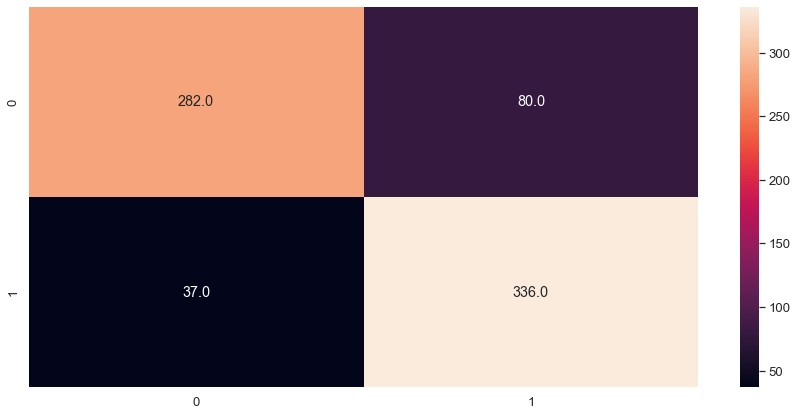

In [61]:
# RandomForest Algorithm
def all(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.1f')
model4=RandomForestClassifier()
all(model1)    

[[281  80]
 [ 38 336]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       361
           1       0.81      0.90      0.85       374

    accuracy                           0.84       735
   macro avg       0.84      0.84      0.84       735
weighted avg       0.84      0.84      0.84       735



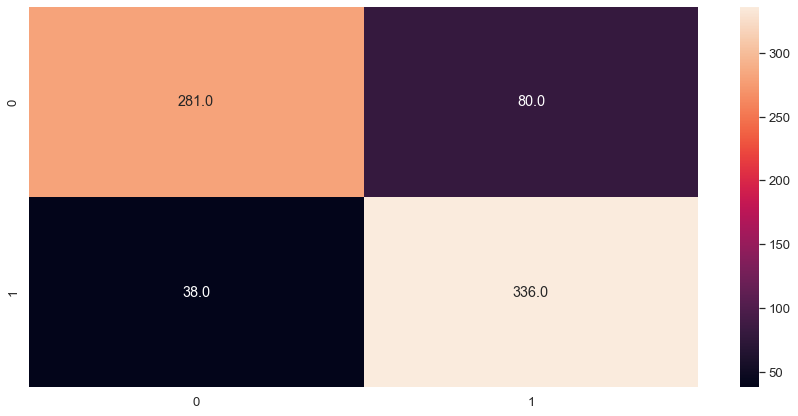

In [59]:
def all(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.1f')
model1=GradientBoostingClassifier()
all(model1)    